# 数据准备

In [1]:
#导包
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#读取数据
mobike=pd.read_csv(r'/Users/apple/Desktop/商业数据分析项目/week 8/week4.mobike.csv',index_col=0)

In [3]:
#显示中文
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
#忽略报错
import warnings
warnings.filterwarnings('ignore')

In [4]:
mobike.head()

,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
439283,21499218,11/14/2018 7:37,11/14/2018 7:44,7,2631,436,319,Greenview Ave & Diversey Pkwy,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1982.0,37
603317,21694389,12/18/2018 19:02,12/18/2018 19:10,7,1565,445,164,Franklin St & Lake St,195,Columbus Dr & Randolph St,Subscriber,Male,1988.0,31
109957,21110722,10/9/2018 12:37,10/9/2018 12:55,18,2231,1090,163,Damen Ave & Clybourn Ave,69,Damen Ave & Pierce Ave,Customer,Male,1989.0,30
428082,21485409,11/12/2018 12:30,11/12/2018 12:40,9,4226,581,226,Racine Ave & Belmont Ave,308,Seeley Ave & Roscoe St,Subscriber,Female,1989.0,30
395437,21445994,11/7/2018 7:29,11/7/2018 7:35,6,3475,390,77,Clinton St & Madison St,621,Aberdeen St & Randolph St,Subscriber,Male,1979.0,40


In [5]:
mobike.shape

(6427, 14)

In [6]:
mobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6427 entries, 439283 to 278179
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            6427 non-null   int64  
 1   start_time         6427 non-null   object 
 2   end_time           6427 non-null   object 
 3   timeduration       6427 non-null   int64  
 4   bikeid             6427 non-null   int64  
 5   tripduration       6427 non-null   int64  
 6   from_station_id    6427 non-null   int64  
 7   from_station_name  6427 non-null   object 
 8   to_station_id      6427 non-null   int64  
 9   to_station_name    6427 non-null   object 
 10  usertype           6427 non-null   object 
 11  gender             5938 non-null   object 
 12  birthyear          5956 non-null   float64
 13  age                6427 non-null   object 
dtypes: float64(1), int64(6), object(7)
memory usage: 753.2+ KB


- gender,birthyear 有缺失
- user_id，start_time，end_time，from_station_id,to_station_id，age 有数据类型错误

In [7]:
#查看缺失占比
mobike.isnull().sum()/len(mobike)

user_id              0.000000
start_time           0.000000
end_time             0.000000
timeduration         0.000000
bikeid               0.000000
tripduration         0.000000
from_station_id      0.000000
from_station_name    0.000000
to_station_id        0.000000
to_station_name      0.000000
usertype             0.000000
gender               0.076085
birthyear            0.073285
age                  0.000000
dtype: float64

In [8]:
mobike.describe(include='all')

,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
count,6.427000e+03,6427,6427,6427.000000,6427.000000,6.427000e+03,6427.000000,6427,6427.000000,6427,6427,5938,5956.000000,6427
unique,NaN,6060,6053,NaN,NaN,NaN,NaN,475,NaN,483,2,2,NaN,63
top,NaN,10/16/2018 17:04,10/26/2018 8:35,NaN,NaN,NaN,NaN,Canal St & Adams St,NaN,Clinton St & Madison St,Subscriber,Male,NaN,
freq,NaN,4,3,NaN,NaN,NaN,NaN,121,NaN,106,5753,4637,NaN,471
mean,2.135519e+07,NaN,NaN,11.778902,3491.637934,1.060471e+03,195.038432,NaN,198.502567,NaN,NaN,NaN,1982.488583,NaN
std,2.181294e+05,NaN,NaN,9.692236,1912.171846,1.456811e+04,148.170025,NaN,148.939873,NaN,NaN,NaN,11.147859,NaN
min,2.098358e+07,NaN,NaN,0.000000,2.000000,6.100000e+01,2.000000,NaN,2.000000,NaN,NaN,NaN,1906.000000,NaN
25%,2.116805e+07,NaN,NaN,5.000000,1852.000000,3.490000e+02,77.000000,NaN,80.000000,NaN,NaN,NaN,1977.000000,NaN
50%,2.135114e+07,NaN,NaN,9.000000,3618.000000,5.590000e+02,168.000000,NaN,172.000000,NaN,NaN,NaN,1986.000000,NaN
75%,2.154376e+07,NaN,NaN,15.000000,5179.500000,9.320000e+02,287.000000,NaN,287.000000,NaN,NaN,NaN,1991.000000,NaN


- birthyear存在异常值，可以用age验证
- timeduration最小值0有问题

In [9]:
sum(mobike.duplicated())

0

# 数据清洗

In [10]:
mobike.head()

,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
439283,21499218,11/14/2018 7:37,11/14/2018 7:44,7,2631,436,319,Greenview Ave & Diversey Pkwy,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1982.0,37
603317,21694389,12/18/2018 19:02,12/18/2018 19:10,7,1565,445,164,Franklin St & Lake St,195,Columbus Dr & Randolph St,Subscriber,Male,1988.0,31
109957,21110722,10/9/2018 12:37,10/9/2018 12:55,18,2231,1090,163,Damen Ave & Clybourn Ave,69,Damen Ave & Pierce Ave,Customer,Male,1989.0,30
428082,21485409,11/12/2018 12:30,11/12/2018 12:40,9,4226,581,226,Racine Ave & Belmont Ave,308,Seeley Ave & Roscoe St,Subscriber,Female,1989.0,30
395437,21445994,11/7/2018 7:29,11/7/2018 7:35,6,3475,390,77,Clinton St & Madison St,621,Aberdeen St & Randolph St,Subscriber,Male,1979.0,40


## user_id

In [11]:
mobike.user_id.nunique()

6427

- 数据中不存在重复用户，不需要进行聚类，可直接删除。

## start_time& end_time 

- 因为存在timeduration，所以只需关注start_time，end_time之一，这里选择start_time。

In [12]:
#转换变量类别-datetime
mobike['start_time']=pd.to_datetime(mobike['start_time'])

In [13]:
mobike['start_time'].dt.year.unique()

array([2018])

In [14]:
mobike['start_time'].dt.month.unique()

array([11, 12, 10])

In [15]:
#创建新变量dayofweek 和 start_hour
mobike['dayofweek'] = mobike['start_time'].dt.dayofweek
mobike['start_hour'] = mobike['start_time'].dt.hour

## timeduration 

In [16]:
mobike['timeduration'].describe()

count    6427.000000
mean       11.778902
std         9.692236
min         0.000000
25%         5.000000
50%         9.000000
75%        15.000000
max        59.000000
Name: timeduration, dtype: float64

- timeduration为0有些奇怪，可以查看为0数据记录

In [17]:
mobike[mobike['timeduration']<1]

,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,dayofweek,start_hour
109113,21109759,2018-10-09 11:29:00,10/9/2018 12:29,0,4875,3616,225,Halsted St & Dickens Ave,172,Rush St & Cedar St,Customer,NaN,NaN,,1,11
72232,21067313,2018-10-06 10:15:00,10/6/2018 11:15,0,4733,3606,419,Lake Park Ave & 53rd St,76,Lake Shore Dr & Monroe St,Customer,NaN,NaN,,5,10
69595,21064115,2018-10-05 18:27:00,10/5/2018 19:28,0,2064,3650,50,Clark St & Congress Pkwy,283,LaSalle St & Jackson Blvd,Customer,Male,1989.0,30,4,18
302629,21336986,2018-10-27 15:33:00,10/27/2018 16:34,0,5051,3634,3,Shedd Aquarium,199,Wabash Ave & Grand Ave,Customer,NaN,NaN,,5,15
592619,21681993,2018-12-17 09:17:00,12/17/2018 10:18,0,4316,3652,99,Lake Shore Dr & Ohio St,96,Desplaines St & Randolph St,Subscriber,Male,1988.0,31,0,9


- timeduration为0部分通过start_time&end_time验证，发现0应为60

In [18]:
#0改为60
mobike['timeduration'] = mobike['timeduration'].replace(0,60)
mobike['timeduration'].describe()

count    6427.000000
mean       11.825580
std         9.779498
min         1.000000
25%         5.000000
50%         9.000000
75%        15.000000
max        60.000000
Name: timeduration, dtype: float64

## bikeid 

- 因为关注的是用户，所以bikeid无用，可直接drop

## tripduration 

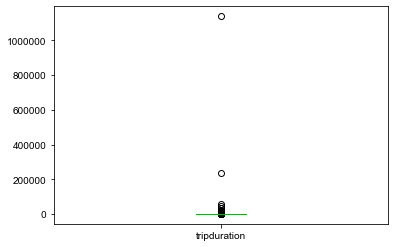

In [19]:
mobike['tripduration'].plot(kind='box');

- tripduration寻在异常值

## station相关

- 此处关注的是user，可删除station相关

## usertype 

In [20]:
#查看usertype类别
mobike.usertype.unique()

array(['Subscriber', 'Customer'], dtype=object)

## gender 

In [21]:
#查看gender类别
mobike.gender.unique()

array(['Male', 'Female', nan], dtype=object)

- 缺失值不多，看下同样缺失的birthyear之后考虑是否删除

## birthyear & age 

- birthyear存在缺失值和异常值，age数据类型错误，而这表示信息相当，可以删除birthyear

In [22]:
#mobike.age.astype(int)
#报错age有‘ ’

In [23]:
#查看age种类
mobike.age.unique()

array(['37', '31', '30', '40', '25', '48', ' ', '28', '27', '34', '33',
       '26', '20', '23', '55', '22', '54', '52', '57', '29', '39', '51',
       '32', '49', '43', '58', '42', '61', '35', '41', '63', '50', '38',
       '36', '44', '62', '19', '59', '45', '46', '56', '21', '24', '47',
       '66', '64', '77', '69', '60', '68', '70', '53', '113', '73', '18',
       '67', '65', '71', '79', '17', '101', '74', '72'], dtype=object)

In [24]:
#查看age为‘ ’时birthyear
mobike[mobike.age == ' ']['birthyear'].unique()

array([nan])

In [25]:
#查看birthyear isna时age
mobike[mobike.birthyear.isna()]['age'].unique()

array([' '], dtype=object)

In [26]:
#确认age‘ ’和birthyear isna的位置是否完全一致
(mobike[mobike.age == ' '].index == mobike[mobike.birthyear.isna()].index).all()

True

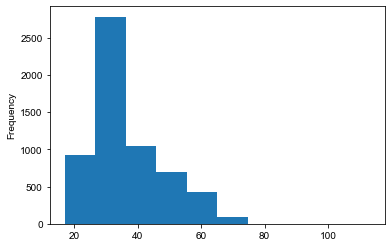

In [27]:
#剔除空格后的age分布
mobike[mobike['age']!=' ']['age'].astype(int).plot(kind='hist');

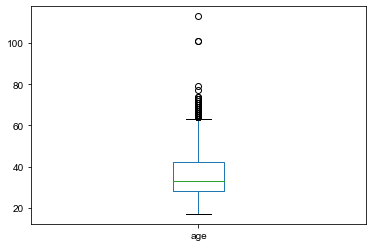

In [28]:
mobike[mobike['age']!=' ']['age'].astype(int).plot(kind='box');

- age有大量异常值存在

In [29]:
#寻找age中位数
age_median=int(mobike[mobike['age']!=' ']['age'].astype(int).median())

In [30]:
#将age空格填充为中位数
mobike['age'] = mobike.age.str.replace(' ',str(age_median)).astype(int)

In [31]:
#删除缺失值
mobike.dropna(inplace=True)

## 删除无关变量 

In [32]:
useless_features = ['user_id','start_time','end_time','bikeid','from_station_name','to_station_name',
                    'from_station_id','to_station_id','birthyear']
mobike = mobike.drop(useless_features,axis=1)

## 异常值处理 

In [33]:
#tripduration异常值处理
IQR = mobike.tripduration.describe()['75%'] - mobike.tripduration.describe()['25%']
new_max_tripduration = mobike.tripduration.describe()['75%'] + 1.5*IQR
new_max_tripduration

1634.125

In [34]:
mobike = mobike[mobike['tripduration']<=new_max_tripduration]

In [35]:
#age异常值处理
IQR = mobike.age.describe()['75%'] - mobike.age.describe()['25%']
new_max_age = mobike.age.describe()['75%'] + 1.5*IQR
new_max_age

63.0

In [36]:
mobike = mobike[mobike['age']<=new_max_age]

# EDA

## 单变量 

In [37]:
mobike.head()

,timeduration,tripduration,usertype,gender,age,dayofweek,start_hour
439283,7,436,Subscriber,Male,37,2,7
603317,7,445,Subscriber,Male,31,1,19
109957,18,1090,Customer,Male,30,1,12
428082,9,581,Subscriber,Female,30,0,12
395437,6,390,Subscriber,Male,40,2,7


### timeduration 

In [38]:
mobike['timeduration'].describe()

count    5457.000000
mean        9.281107
std         5.678630
min         1.000000
25%         5.000000
50%         8.000000
75%        12.000000
max        27.000000
Name: timeduration, dtype: float64

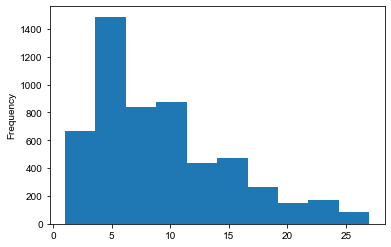

In [39]:
mobike['timeduration'].plot(kind='hist');

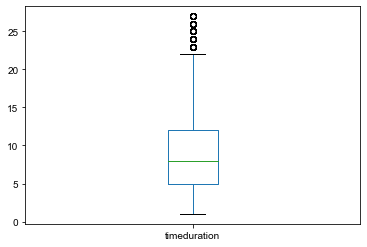

In [40]:
mobike['timeduration'].plot(kind='box');

In [41]:
#timeduration异常值处理
#IQR = mobike.timeduration.describe()['75%'] - mobike.timeduration.describe()['25%']
#new_max_timeduration = mobike.timeduration.describe()['75%'] + 1.5*IQR
#new_max_timeduration
#mobike = mobike[mobike['timeduration']<=new_max_timeduration]

### tripduration

In [42]:
mobike['tripduration'].describe()

count    5457.000000
mean      586.365952
std       340.638932
min        61.000000
25%       325.000000
50%       500.000000
75%       776.000000
max      1633.000000
Name: tripduration, dtype: float64

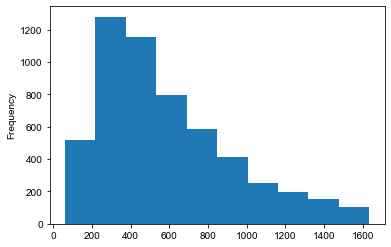

In [43]:
mobike['tripduration'].plot(kind='hist');

### usertype

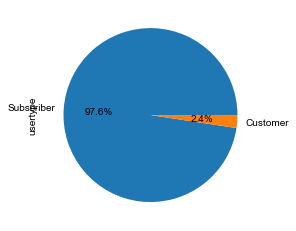

In [44]:
mobike['usertype'].value_counts().plot(kind='pie',autopct='%1.1f%%');

### gender

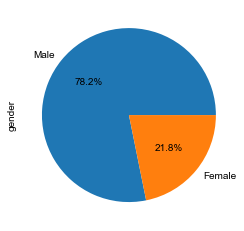

In [45]:
mobike['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%');

### age

In [46]:
mobike['age'].describe()

count    5457.000000
mean       35.843321
std        10.235023
min        17.000000
25%        28.000000
50%        33.000000
75%        41.000000
max        63.000000
Name: age, dtype: float64

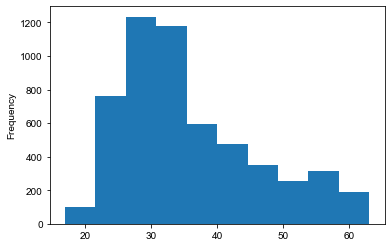

In [47]:
mobike['age'].plot(kind='hist');

### dayofweek

In [48]:
mobike['dayofweek'].value_counts()

1    1010
2     987
3     916
0     911
4     802
5     451
6     380
Name: dayofweek, dtype: int64

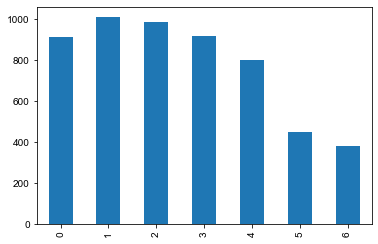

In [49]:
mobike['dayofweek'].value_counts().sort_index().plot(kind='bar');

### start_hour

In [50]:
mobike.start_hour.describe()

count    5457.000000
mean       13.207440
std         4.787171
min         0.000000
25%         8.000000
50%        14.000000
75%        17.000000
max        23.000000
Name: start_hour, dtype: float64

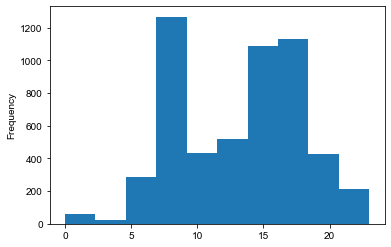

In [51]:
mobike.start_hour.plot(kind='hist')

In [52]:
#start_hour分箱
bins=[0,6,9,16,19,24]
labels=['凌晨','早高峰','工作时间','晚高峰','夜间']
mobike['time_period']=pd.cut(mobike.start_hour,bins,right=False,labels=labels)
mobike['time_period'].value_counts(1)

工作时间    0.319956
晚高峰     0.306395
早高峰     0.228697
夜间      0.118014
凌晨      0.026938
Name: time_period, dtype: float64

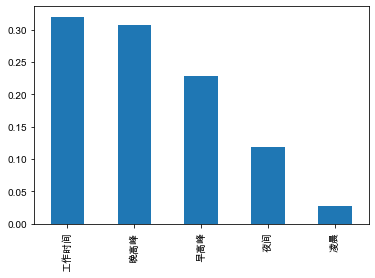

In [53]:
mobike['time_period'].value_counts(1).plot(kind='bar');

- 晚高峰 和 早高峰 选择骑行人数最多

In [54]:
#可以删除start_hour变量，留取time_period
mobike.drop('start_hour',axis=1,inplace=True)

## 多变量

### 数值变量&数值变量

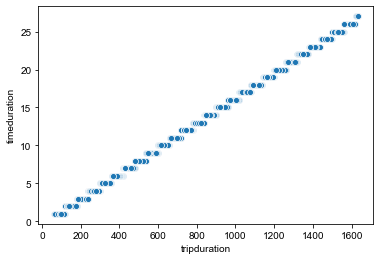

In [55]:
sns.scatterplot(x='tripduration',y='timeduration',data=mobike);

- tripduration & timeduration 正相关，之后变量分析可选其中之一

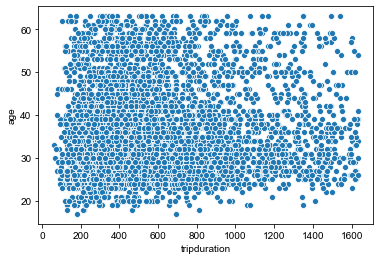

In [56]:
sns.scatterplot(x='tripduration',y='age',data=mobike);

In [57]:
mobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5457 entries, 439283 to 278179
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   timeduration  5457 non-null   int64   
 1   tripduration  5457 non-null   int64   
 2   usertype      5457 non-null   object  
 3   gender        5457 non-null   object  
 4   age           5457 non-null   int64   
 5   dayofweek     5457 non-null   int64   
 6   time_period   5457 non-null   category
dtypes: category(1), int64(4), object(2)
memory usage: 304.0+ KB


### 类别变量&数值变量

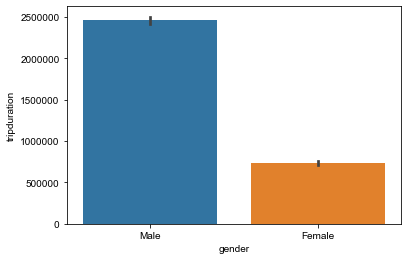

In [58]:
sns.barplot(x='gender',y='tripduration',estimator=sum,data=mobike);

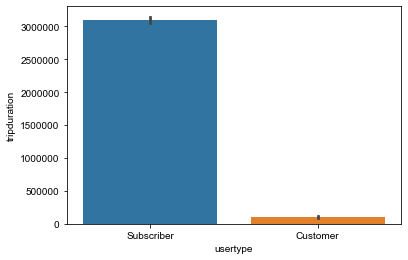

In [59]:
sns.barplot(x='usertype',y='tripduration',estimator=sum,data=mobike);

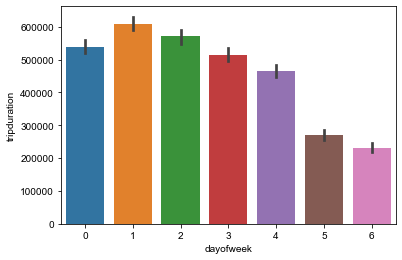

In [60]:
sns.barplot(x='dayofweek',y='tripduration',estimator=sum,data=mobike);

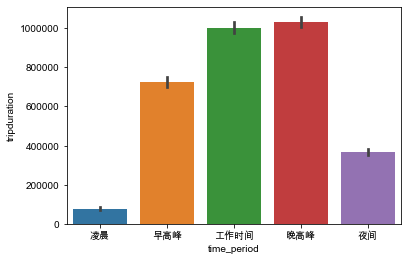

In [61]:
sns.barplot(x='time_period',y='tripduration',estimator=sum,data=mobike);

- 男性骑行总路程远大于女性和unknown
- 订阅者骑行总路程远高于普通用户
- 周一至周五（工作日）骑行总路程远高于周末
- 早晚高峰骑行总路程远高于其他时段

### 类别变量&类别变量

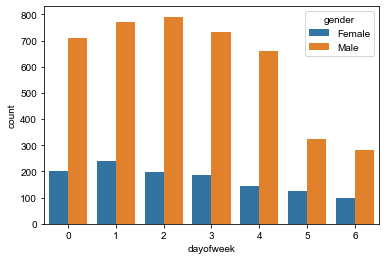

In [62]:
tmp = pd.DataFrame(mobike.groupby(['dayofweek','gender'])['usertype'].count()).reset_index()
tmp = tmp.rename(columns={'usertype':'count'})
sns.barplot(x='dayofweek',y='count',hue='gender',data=tmp);

- Unknown在周末骑行人数较周内多
- female & male 在周内骑行人数较周末多

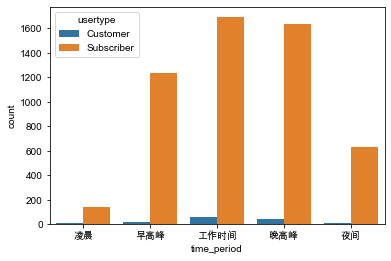

In [63]:
tmp = pd.DataFrame(mobike.groupby(['time_period','usertype'])['gender'].count()).reset_index()
tmp = tmp.rename(columns={'gender':'count'})
sns.barplot(x='time_period',y='count',hue='usertype',data=tmp);

- 订阅用户在早晚高峰时段出行最多，说明他们应该有固定时间的出行需求，所以才会订阅。
- 普通用户在不同时段出行差别不是很大，说明他们出行需求没有固定时间。

# 建模

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [65]:
mobike.head()

,timeduration,tripduration,usertype,gender,age,dayofweek,time_period
439283,7,436,Subscriber,Male,37,2,早高峰
603317,7,445,Subscriber,Male,31,1,夜间
109957,18,1090,Customer,Male,30,1,工作时间
428082,9,581,Subscriber,Female,30,0,工作时间
395437,6,390,Subscriber,Male,40,2,早高峰


In [66]:
mobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5457 entries, 439283 to 278179
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   timeduration  5457 non-null   int64   
 1   tripduration  5457 non-null   int64   
 2   usertype      5457 non-null   object  
 3   gender        5457 non-null   object  
 4   age           5457 non-null   int64   
 5   dayofweek     5457 non-null   int64   
 6   time_period   5457 non-null   category
dtypes: category(1), int64(4), object(2)
memory usage: 464.0+ KB


In [67]:
mobike_attempt_1= mobike.copy()
mobike_attempt_1 = pd.get_dummies(mobike_attempt_1,drop_first=True)
mobike_attempt_1.head()

,timeduration,tripduration,age,dayofweek,usertype_Subscriber,gender_Male,time_period_早高峰,time_period_工作时间,time_period_晚高峰,time_period_夜间
439283,7,436,37,2,1,1,1,0,0,0
603317,7,445,31,1,1,1,0,0,0,1
109957,18,1090,30,1,0,1,0,1,0,0
428082,9,581,30,0,1,0,0,1,0,0
395437,6,390,40,2,1,1,1,0,0,0


In [68]:
mobike_attempt_1[mobike_attempt_1.columns.tolist()].corr()

,timeduration,tripduration,age,dayofweek,usertype_Subscriber,gender_Male,time_period_早高峰,time_period_工作时间,time_period_晚高峰,time_period_夜间
timeduration,1.000000,0.998675,0.050498,-0.003867,-0.093003,-0.053849,-0.007440,-0.029046,0.057335,-0.015208
tripduration,0.998675,1.000000,0.049849,-0.002513,-0.093519,-0.052986,-0.007810,-0.027042,0.056448,-0.015670
age,0.050498,0.049849,1.000000,-0.054607,0.055613,0.059189,0.079919,0.010808,-0.012936,-0.086753
dayofweek,-0.003867,-0.002513,-0.054607,1.000000,-0.061353,-0.010356,-0.117133,0.186118,-0.100755,0.012852
usertype_Subscriber,-0.093003,-0.093519,0.055613,-0.061353,1.000000,0.001825,0.042147,-0.037111,-0.005653,0.012447
gender_Male,-0.053849,-0.052986,0.059189,-0.010356,0.001825,1.000000,0.028920,-0.004691,-0.003929,-0.025365
time_period_早高峰,-0.007440,-0.007810,0.079919,-0.117133,0.042147,0.028920,1.000000,-0.373503,-0.361912,-0.199183
time_period_工作时间,-0.029046,-0.027042,0.010808,0.186118,-0.037111,-0.004691,-0.373503,1.000000,-0.455892,-0.250906
time_period_晚高峰,0.057335,0.056448,-0.012936,-0.100755,-0.005653,-0.003929,-0.361912,-0.455892,1.000000,-0.243120
time_period_夜间,-0.015208,-0.015670,-0.086753,0.012852,0.012447,-0.025365,-0.199183,-0.250906,-0.243120,1.000000


In [69]:
#数据标准化
X = mobike_attempt_1[['timeduration','usertype_Subscriber','gender_Male','age']]
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(X))

In [70]:
#for循环寻找最佳分裂数
scores=[]
centers=list(range(2,10))

for center in centers:
    kmeans = KMeans(n_clusters=center)
    model=kmeans.fit(X)
    label=model.predict(X)
    score=silhouette_score(X,label)
    scores.append(score)

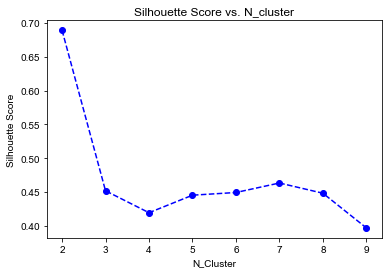

In [71]:
#可视化for循环结果
plt.plot(centers,scores,linestyle='--',marker='o',color='b');
plt.xlabel('N_Cluster');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. N_cluster');

- 轮廓系数都偏低，再挖掘其他特征。

# 优化挖掘特征

In [72]:
#dayofweek分箱
bins=[0,5,6]
labels=['工作日','周末']
mobike['week_period']=pd.cut(mobike.dayofweek,bins,right=False,labels=labels)
mobike['week_period'].value_counts(1)

工作日    0.911168
周末     0.088832
Name: week_period, dtype: float64

In [73]:
#可以删除dayofweek变量
mobike.drop('dayofweek',axis=1,inplace=True)
mobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5457 entries, 439283 to 278179
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   timeduration  5457 non-null   int64   
 1   tripduration  5457 non-null   int64   
 2   usertype      5457 non-null   object  
 3   gender        5457 non-null   object  
 4   age           5457 non-null   int64   
 5   time_period   5457 non-null   category
 6   week_period   5077 non-null   category
dtypes: category(2), int64(3), object(2)
memory usage: 426.7+ KB


In [74]:
mobike_attempt_2 = mobike.copy()
mobike_attempt_2 = pd.get_dummies(mobike_attempt_2,drop_first=True)
mobike_attempt_2.head()

,timeduration,tripduration,age,usertype_Subscriber,gender_Male,time_period_早高峰,time_period_工作时间,time_period_晚高峰,time_period_夜间,week_period_周末
439283,7,436,37,1,1,1,0,0,0,0
603317,7,445,31,1,1,0,0,0,1,0
109957,18,1090,30,0,1,0,1,0,0,0
428082,9,581,30,1,0,0,1,0,0,0
395437,6,390,40,1,1,1,0,0,0,0


In [75]:
mobike_attempt_2[mobike_attempt_2.columns.tolist()].corr()

,timeduration,tripduration,age,usertype_Subscriber,gender_Male,time_period_早高峰,time_period_工作时间,time_period_晚高峰,time_period_夜间,week_period_周末
timeduration,1.000000,0.998675,0.050498,-0.093003,-0.053849,-0.007440,-0.029046,0.057335,-0.015208,0.008465
tripduration,0.998675,1.000000,0.049849,-0.093519,-0.052986,-0.007810,-0.027042,0.056448,-0.015670,0.009252
age,0.050498,0.049849,1.000000,0.055613,0.059189,0.079919,0.010808,-0.012936,-0.086753,-0.056989
usertype_Subscriber,-0.093003,-0.093519,0.055613,1.000000,0.001825,0.042147,-0.037111,-0.005653,0.012447,-0.040395
gender_Male,-0.053849,-0.052986,0.059189,0.001825,1.000000,0.028920,-0.004691,-0.003929,-0.025365,-0.044419
time_period_早高峰,-0.007440,-0.007810,0.079919,0.042147,0.028920,1.000000,-0.373503,-0.361912,-0.199183,-0.104810
time_period_工作时间,-0.029046,-0.027042,0.010808,-0.037111,-0.004691,-0.373503,1.000000,-0.455892,-0.250906,0.170784
time_period_晚高峰,0.057335,0.056448,-0.012936,-0.005653,-0.003929,-0.361912,-0.455892,1.000000,-0.243120,-0.107098
time_period_夜间,-0.015208,-0.015670,-0.086753,0.012447,-0.025365,-0.199183,-0.250906,-0.243120,1.000000,0.032543
week_period_周末,0.008465,0.009252,-0.056989,-0.040395,-0.044419,-0.104810,0.170784,-0.107098,0.032543,1.000000


In [76]:
#数据标准化
X = mobike_attempt_2[['timeduration','age','usertype_Subscriber','gender_Male','time_period_早高峰','time_period_晚高峰','week_period_周末']]
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(X))

In [77]:
#for循环寻找最佳分裂数
scores=[]
centers=list(range(2,10))

for center in centers:
    kmeans = KMeans(n_clusters=center)
    model=kmeans.fit(X)
    label=model.predict(X)
    score=silhouette_score(X,label)
    scores.append(score)

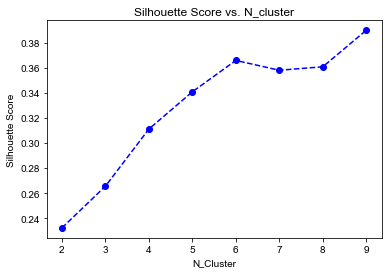

In [78]:
#可视化for循环结果
plt.plot(centers,scores,linestyle='--',marker='o',color='b');
plt.xlabel('N_Cluster');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. N_cluster');

- 由图可见，选择6作为群集数

# 业务解读

In [79]:
kmeans = KMeans(n_clusters=6)
model=kmeans.fit(X)
label=model.predict(X)
score=silhouette_score(X,label)
centers = pd.DataFrame(model.cluster_centers_)
centers.to_csv('mobike_attempt_centers.csv')

In [80]:
mobike_attempt_2['cluster']=model.labels_
mobike_attempt_2['cluster'].value_counts(1)

2    0.304380
0    0.224666
1    0.219168
4    0.148983
5    0.078981
3    0.023823
Name: cluster, dtype: float64

In [81]:
centers.columns=['timeduration','age','usertype_Subscriber','gender_Male','time_period_早高峰','time_period_晚高峰','week_period_周末']
print(centers)

   timeduration       age  usertype_Subscriber  gender_Male  time_period_早高峰  \
0      0.061247  0.011962             0.156218     0.528379        -0.544525   
1     -0.009307  0.148153             0.156218     0.056737         1.836463   
2     -0.122879 -0.000103             0.156218     0.528379        -0.544525   
3      0.595344 -0.355999            -6.401322    -0.011681        -0.269796   
4      0.083283 -0.090816             0.156218    -1.892581        -0.544525   
5     -0.011506 -0.166060             0.156218    -0.123202        -0.340125   

   time_period_晚高峰  week_period_周末  
0         1.504578       -0.300153  
1        -0.664638       -0.300153  
2        -0.664638       -0.300153  
3         0.036186        0.258583  
4         0.253210       -0.300153  
5        -0.362659        3.331633  


#通过绝对值读取群集标签
- 0群男性订阅用户，偏好工作日出行，占比30.4%；
- 1群女性订阅用户，偏好工作日晚高峰出行，占比14.9%；
- 2群女性订阅用户，偏好周末闲暇时间出行，占比7.8%；
- 3群男性订阅用户，偏好工作日早高峰出行，占比21.9%；
- 4群男性订阅用户，偏好工作日晚高峰出行，占比22.5%；
- 5群女性普通用户，偏好周末晚高峰出行，占比2.4%；